In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
print(tf.__version__)

Saving kaggle.json to kaggle.json
2.3.0


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download --force ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text


  0% 0.00/814k [00:00<?, ?B/s]
100% 814k/814k [00:00<00:00, 49.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('indonesian-abusive-and-hate-speech-twitter-text.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Link dataset : https://www.kaggle.com/ilhamfp31/indonesian-abusive-and-hate-speech-twitter-text
df = pd.read_csv("/tmp/data.csv", sep=',', engine ='python')
df = df.drop(columns = ['Abusive','HS_Weak','HS_Moderate','HS_Strong'])
df

,Tweet,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,0,0,0,0,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,0,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
tweet = df['Tweet'].values
hasil = df[['HS','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other']].values
tweet_train, tweet_test, hasil_train, hasil_test = train_test_split(tweet, hasil, test_size = 0.2)

In [ ]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '-', filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(tweet_train)
tokenizer.fit_on_texts(tweet_test)

sequence_train = tokenizer.texts_to_sequences(tweet_train)
sequence_test = tokenizer.texts_to_sequences(tweet_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

print(tweet_train.shape,hasil_train.shape)
print(tweet_test.shape,hasil_test.shape)

(10535,) (10535, 8)
(2634,) (2634, 8)


In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 16),
        tf.keras.layers.LSTM(512),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(8, activation = 'sigmoid')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(padded_train, hasil_train, epochs=20, validation_data=(padded_test, hasil_test), verbose=2)

Epoch 1/20
330/330 - 7s - loss: 2.1469 - accuracy: 0.9965 - val_loss: 2.1629 - val_accuracy: 1.0000
Epoch 2/20
330/330 - 6s - loss: 1.9690 - accuracy: 1.0000 - val_loss: 2.0583 - val_accuracy: 1.0000
Epoch 3/20
330/330 - 6s - loss: 1.9060 - accuracy: 1.0000 - val_loss: 2.0433 - val_accuracy: 1.0000
Epoch 4/20
330/330 - 6s - loss: 1.8249 - accuracy: 1.0000 - val_loss: 2.0211 - val_accuracy: 1.0000
Epoch 5/20
330/330 - 6s - loss: 1.9175 - accuracy: 1.0000 - val_loss: 2.1010 - val_accuracy: 1.0000
Epoch 6/20
330/330 - 6s - loss: 1.9439 - accuracy: 1.0000 - val_loss: 2.0968 - val_accuracy: 1.0000
Epoch 7/20
330/330 - 6s - loss: 1.8298 - accuracy: 1.0000 - val_loss: 2.0638 - val_accuracy: 1.0000
Epoch 8/20
330/330 - 6s - loss: 1.7505 - accuracy: 1.0000 - val_loss: 2.0998 - val_accuracy: 1.0000
Epoch 9/20
330/330 - 6s - loss: 1.6985 - accuracy: 1.0000 - val_loss: 2.1725 - val_accuracy: 1.0000
Epoch 10/20
330/330 - 6s - loss: 1.6543 - accuracy: 1.0000 - val_loss: 2.2299 - val_accuracy: 1.0000

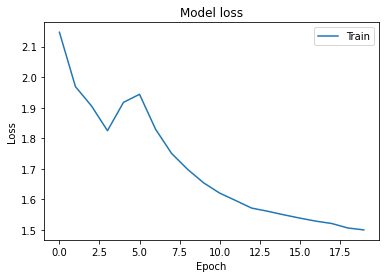

In [ ]:
plt.plot(model.history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

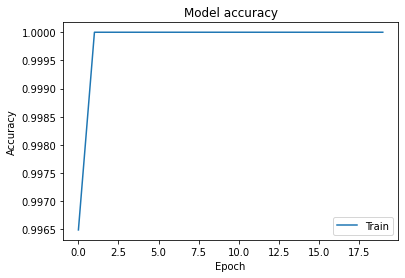

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

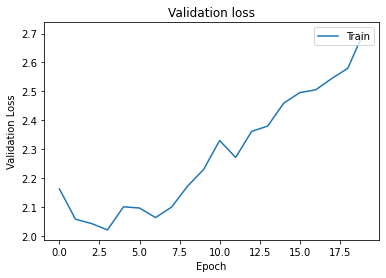

In [ ]:
plt.plot(model.history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

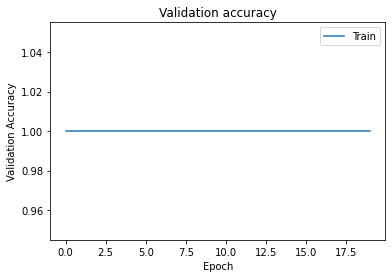

In [ ]:
plt.plot(model.history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()